In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager, rc
import platform

# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [14]:
def step(x):
    return np.where(x > 0, 1, 0)

In [45]:
x = np.arange(-5, 5, 0.1)

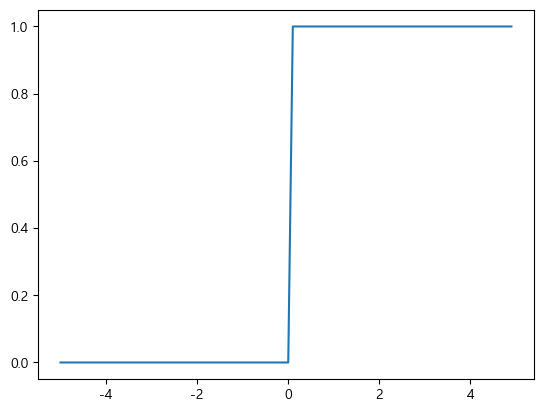

In [18]:
plt.plot(x,step(x))
plt.show()

In [19]:
def sigmoid(x):
    return 1/ (1+np.exp(-x))

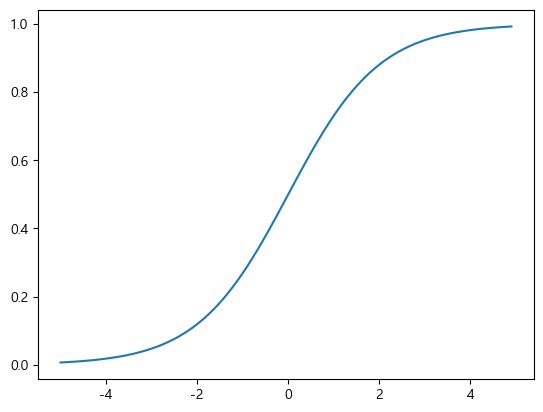

In [21]:
plt.plot(x, sigmoid(x))
plt.show()

In [36]:
def relu1(x):
    return np.where(x > 0, x,0)

In [37]:
def relu2(x):
    return np.maximum(0,x)

In [42]:
X = np.random.randn(100000, 100)

In [43]:
%%time
np.sum(relu1(x))

CPU times: total: 62.5 ms
Wall time: 61.8 ms


3984853.431628667

In [44]:
%%time
np.sum(relu2(x))

CPU times: total: 188 ms
Wall time: 203 ms


3984853.431628667

In [46]:
def relu(x):
    return np.maximum(0,x)

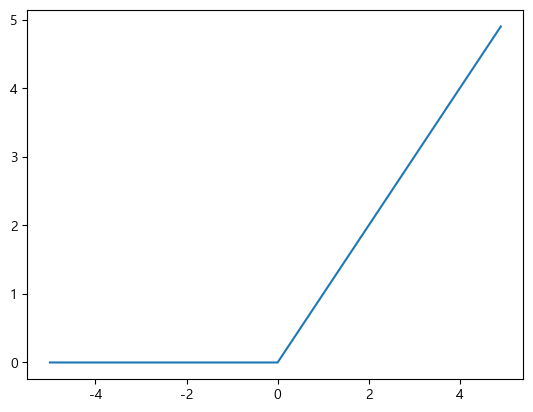

In [49]:
plt.plot(x,relu(x))
plt.show()

In [61]:
def softmax(x) :
    c = np.max(x)
    x = x - c
    return np.exp(x)/np.sum(np.exp(x))

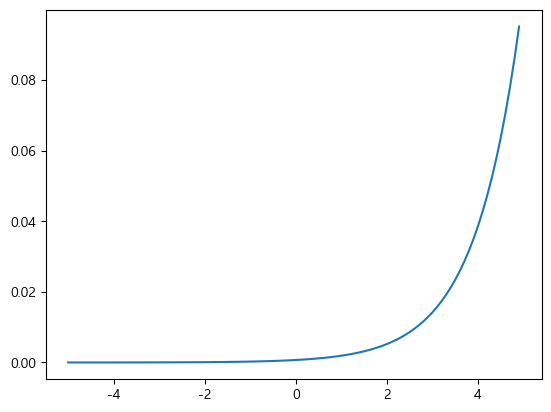

In [62]:
plt.plot(x, softmax(x))
plt.show()

In [64]:
softmax(np.array([1000,2,3]))

array([1., 0., 0.])

In [65]:
from sklearn.datasets import load_iris

In [68]:
iris = load_iris()

In [96]:
x = iris['data']
y = iris['target']

In [75]:
x.shape

(150, 4)

In [79]:
W1 = np.random.randn(4, 128)
b1 = np.zeros(128)
W2 = np.random.randn(128, 64)
b2 = np.zeros(64)
W3 = np.random.randn(64,3)
b3 = np.zeros(3)

layer1 = np.dot(x,W1) + b1
z1 = sigmoid(layer1)
layer2 = np.dot(z1,W2) + b2
z2 = relu(layer2)
layer3 = np.dot(z2,W3) + b3
output = softmax(layer3)

In [82]:
np.unique(y).size

3

In [97]:
def make_one_hot(x):
    result = np.zeros((x.size, np.unique(x).size))
    for idx1, idx2 in enumerate(x):
        result[idx1, idx2] = 1
    return result

In [98]:
y = make_one_hot(y)

In [102]:
np.argmax(output[0])

1

In [86]:
result = np.zeros((y.size,np.unique(y).size))
result.shape

(150, 3)

In [78]:
output

array([[4.46518962e-03, 4.14856050e-35, 2.35097845e-20],
       [1.04754590e-04, 7.04208117e-36, 2.49122939e-21],
       [2.09529598e-03, 2.73013191e-35, 1.45267392e-20],
       [3.79912076e-04, 8.46552875e-36, 2.34604450e-21],
       [1.49774350e-02, 3.56359906e-35, 2.34366068e-20],
       [4.16252181e-03, 1.24268485e-35, 3.26611084e-21],
       [5.97854781e-03, 1.92368803e-35, 6.35624833e-21],
       [1.65605108e-03, 2.00975905e-35, 9.05430009e-21],
       [1.80043831e-04, 6.66606777e-36, 1.77191946e-21],
       [2.74125474e-04, 6.80321259e-36, 3.35863200e-21],
       [5.03811432e-03, 4.06842273e-35, 2.60445626e-20],
       [1.99133669e-03, 9.46200458e-36, 3.17933089e-21],
       [2.53412618e-04, 8.98754677e-36, 4.33339499e-21],
       [4.96295031e-03, 2.27725008e-35, 2.50760657e-20],
       [2.07164602e-02, 1.47462628e-34, 2.83609296e-19],
       [1.50037328e-01, 4.21635372e-35, 2.89951343e-20],
       [2.20138466e-02, 9.10812584e-35, 4.55671987e-20],
       [2.67845077e-03, 4.06153

In [107]:
def binary_entropy(y,t):
    return np.mean(t*np.log(y) + (1-t)*np.log(1-y)) * -1

In [104]:
def categorical_crossentropy(y,t):
    return np.mean(-t*np.log(y))

In [106]:
categorical_crossentropy(output, y)

11.890541679105766

In [198]:
def grad(f, x):
    h = 1e-4
    x = float(x)
    fxh = f(x+h)
    fx = f(x)
    return (fxh - fx)/ h

In [221]:
f = lambda x : x**2

grad(f, 3)

6.000100000012054

In [200]:
x = np.array([2.,1.])

In [225]:
def fx(x):
    fx = [3*x[0]**2, 2*x[1]]    
    return fx

In [226]:
fx(x)

[12.0, 2.0]

In [227]:
def par_grad(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for i in range(grad.size) :
        tmp = x[i]
        x[i] = tmp + h
        fxh = f(x)
        x[i] = tmp
        fx = f(x)
        grad[i] = (fxh-fx)/h
    
    return grad

In [230]:
par_grad(f,x)

ValueError: setting an array element with a sequence.

In [231]:
it = np.nditer(x, flage = ['multi_index'], op_flags =['readwrite']

In [258]:
it.multi_index
it.iternext()

True

In [259]:
it.multi_index

(3, 0)

In [260]:
it.finished

False